# THE SPARKS FOUNDATION

### TASK 2: predict the optimum number of clusters and represent it visually.

##### K-MEANS CLUSTERING
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n 
observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or 
cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi
cells. It is popular for cluster analysis in data mining. k-means clustering minimizes within-cluster variances
(squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: 
the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

In [11]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
%matplotlib inline

In [3]:
# Load the iris dataset
iris = datasets.load_iris()

In [4]:
#convert data into pandas dataframe
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [7]:
# see the first 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Finding the optimum number of clusters for K-Means and determining the value of K

In [10]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

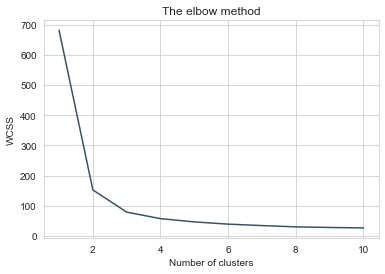

In [13]:
# Plotting the results onto a line graph, `allowing us to observe 'The elbow'
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The above graph the viusual representation of 'The elbow method', the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as 3.

In [14]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#### VISUALISING THE CLUSTERS

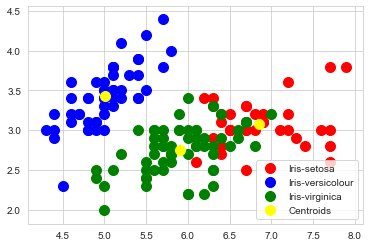

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')


# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

#                        -------------------------END--------------------